In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [4]:
X = data[:, 0]
y = data[:, 1]

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

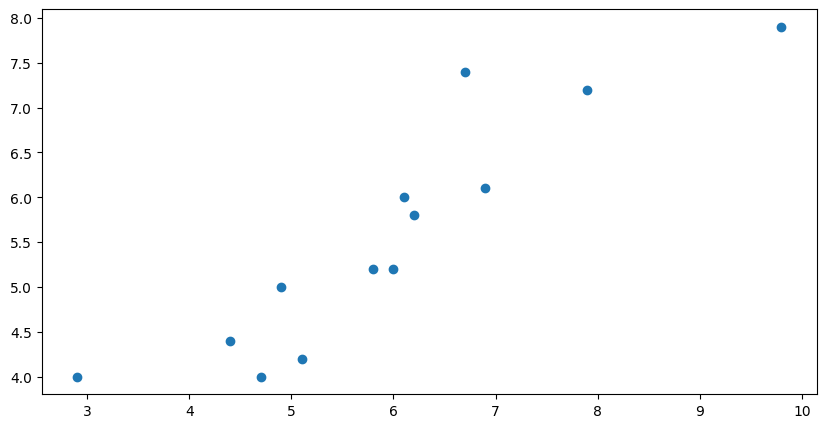

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(X, y);

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with zeros. Also choose the Learning rate.

In [8]:
theta_0, theta_1 = 0,0
lr=0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [9]:
h_x = theta_0+theta_1*X
h_x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> use norm square of the error vector.

In [10]:
error_vector = (h_x - y)
MSE = np.sum(error_vector**2) / (2*len(y))

print('Error Vector\n', error_vector)
print('\nj = ', MSE)

Error Vector
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [11]:
d_theta_0 = (np.sum(h_x - y))/len(y)
d_theta_1 = (np.sum((h_x - y) *X))/len(y)

print('d_theta_0 : ', d_theta_0)
print('d_theta_1 : ', d_theta_1)

d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.043846043215375


### Step5: Update the parameters.

In [12]:
theta_0 = theta_0 - d_theta_0*lr
theta_1 = theta_1 - d_theta_1*lr

print('theta_0_new : ', theta_0)
print('theta_1_new : ', theta_1)

theta_0_new :  0.00556923073976923
theta_1_new :  0.03504384604321537


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [13]:
theta_0, theta_1 = 0,0
lr=0.001

for i in range(1000):
    print(f'****************** Iteration {i} ********************\n')

    h_x = theta_0+theta_1*X
    print('h(x) : ', h_x)

    error_vector = (h_x - y)
    print('\nError Vector :\n', error_vector)

    MSE = np.sum(error_vector**2) / (2*len(y))
    print('\nj = ', MSE)

    d_theta_0 = (np.sum(h_x - y))/len(y)
    d_theta_1 = (np.sum((h_x - y) *X))/len(y)

    gradient_vector = np.array([d_theta_0, d_theta_1])
    print('\nGradient Vector : \n', gradient_vector)

    gradient_vec_norm = np.linalg.norm(gradient_vector)
    print('\n Gradient Vector Norm : ', gradient_vec_norm)


    if gradient_vec_norm <=0.1:
        print('****************** Training Report ********************')
        print(f'Gradient Descent converged after {i} iterations')
        print('theta_0_Opt : ', theta_0)
        print('theta_1_Opt : ', theta_1)
        print('\nError Vector :\n', error_vector)
        print('Cost = ', MSE)
        print('h(x) = y_predict: \n', h_x)
        print('y_actual : ', y)

        break

    theta_0 = theta_0 - d_theta_0*lr
    theta_1 = theta_1 - d_theta_1*lr
    print('theta_0_new : ', theta_0)
    print('theta_1_new : ', theta_1)

****************** Iteration 0 ********************

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector :
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector : 
 [ -5.56923074 -35.04384604]

 Gradient Vector Norm :  35.483622652335995
theta_0_new :  0.00556923073976923
theta_1_new :  0.03504384604321537
****************** Iteration 1 ********************

h(x) :  [0.10719639 0.24036299 0.17728408 0.28241562 0.34899893 0.24737177
 0.21933669 0.22284107 0.21583231 0.18429284 0.1702753  0.15976216
 0.20882354]

Error Vector :
 [-3.89280361 -7.1596371  -4.82271592 -6.91758419 -7.55100117 -5.85262813
 -5.78066331 -5.57715912 -4.9841675  -4.01570697 -3.8297247  -4.24023794
 -4.99117626]

j =  15.070907994095792

Gradient Vector : 
 [ -5.35501584 -33.6733067 ]

 Gradient Vector Norm :  34.09644818591864
theta_0_new :  0.01092424658056

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
y_pred = theta_0 + theta_1*X
print('h(x) = y_predict:\n', y_pred)
print('\ny_actual : \n', y)

h(x) = y_predict:
 [2.7456161  6.14022094 4.53225036 7.21220176 8.9095044  6.31888463
 5.60423075 5.69356238 5.51489912 4.71091362 4.35358668 4.0855918
 5.33623587]

y_actual : 
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

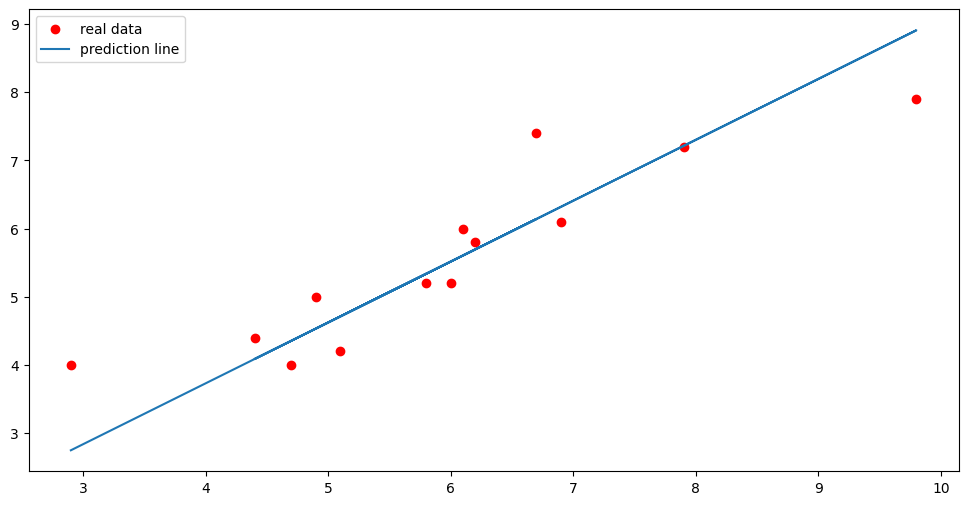

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='real data', c='r')
plt.plot(X, y_pred, label='prediction line')
plt.legend();

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.7483046604086072

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [17]:
theta_0, theta_1 = 0,0
lr=0.01
loss = []

for i in range(1000):
    print(f'****************** Iteration {i} ********************\n')

    h_x = theta_0+theta_1*X
    print('h(x) : ', h_x)

    error_vector = (h_x - y)
    print('\nError Vector :\n', error_vector)

    MSE = np.sum(error_vector**2) / (2*len(y))
    loss.append(MSE)
    print('\nj = ', MSE)

    d_theta_0 = (np.sum(h_x - y))/len(y)
    d_theta_1 = (np.sum((h_x - y) *X))/len(y)

    gradient_vector = np.array([d_theta_0, d_theta_1])
    print('\nGradient Vector : \n', gradient_vector)

    gradient_vec_norm = np.linalg.norm(gradient_vector)
    print('\n Gradient Vector Norm : ', gradient_vec_norm)

    if gradient_vec_norm <=0.1:
        print('****************** Training Report ********************')
        print(f'Gradient Descent converged after {i} iterations')
        print('theta_0_Opt : ', theta_0)
        print('theta_1_Opt : ', theta_1)
        print('\nError Vector :\n', error_vector)
        print('Cost = ', MSE)
        print('h(x) = y_predict: \n', h_x)
        print('y_actual : ', y)

        break


    theta_0 = theta_0 - d_theta_0*lr
    theta_1 = theta_1 - d_theta_1*lr
    print('theta_0_new : ', theta_0)
    print('theta_1_new : ', theta_1)


****************** Iteration 0 ********************

h(x) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error Vector :
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j =  16.305384479692318

Gradient Vector : 
 [ -5.56923074 -35.04384604]

 Gradient Vector Norm :  35.483622652335995
theta_0_new :  0.0556923073976923
theta_1_new :  0.35043846043215376
****************** Iteration 1 ********************

h(x) :  [1.07196388 2.40362993 1.7728408  2.82415618 3.48998929 2.47371772
 2.19336688 2.2284107  2.15832307 1.84292842 1.702753   1.59762157
 2.08823544]

Error Vector :
 [-2.92803612 -4.99637017 -3.2271592  -4.37584363 -4.41001081 -3.62628219
 -3.80663312 -3.5715895  -3.04167674 -2.35707139 -2.297247   -2.80237853
 -3.11176436]

j =  6.175608808043304

Gradient Vector : 
 [ -3.42708175 -21.33845263]

 Gradient Vector Norm :  21.611905283072655
theta_0_new :  0.089963124898030

### Plot loss vs. iterations

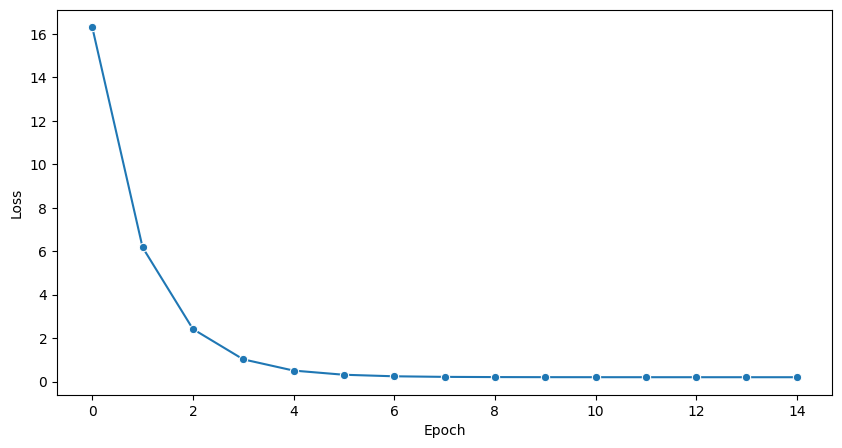

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss');

## Full Code

In [50]:
def GD_SingleVariable(X, y, epochs=1000 , stop_condition=0.1, theta_0 = 0, theta_1=0, lr=0.01):
  loss = []

  for i in tqdm(range(epochs)):
      # print(f'****************** Iteration {i} ********************\n')

      h_x = theta_0+theta_1*X
      # print('h(x) : ', h_x)

      error_vector = (h_x - y)
      # print('\nError Vector :\n', error_vector)

      MSE = np.sum(error_vector**2) / (2*len(y))
      loss.append(MSE)
      # print('\nj = ', MSE)

      d_theta_0 = (np.sum(h_x - y))/len(y)
      d_theta_1 = (np.sum((h_x - y) *X))/len(y)

      gradient_vector = np.array([d_theta_0, d_theta_1])
      # print('\nGradient Vector : \n', gradient_vector)

      gradient_vec_norm = np.linalg.norm(gradient_vector)
      # print('\n Gradient Vector Norm : ', gradient_vec_norm)

      if gradient_vec_norm <=stop_condition:
        print('****************** Training Report ********************')
        print(f'Gradient Descent converged after {i} iterations')
        print('theta_0_Opt : ', theta_0)
        print('theta_1_Opt : ', theta_1)
        # print('\nError Vector :\n', error_vector)
        print('Cost = ', MSE)
        # print('h(x) = y_predict: \n', h_x)
        # print('y_actual : ', y)
        break


      theta_0 = theta_0 - d_theta_0*lr
      theta_1 = theta_1 - d_theta_1*lr
      # print('theta_0_new : ', theta_0)
      # print('theta_1_new : ', theta_1)

  return theta_0, theta_1, loss

def plot_loss(loss):
  plt.figure(figsize=(10,5))
  sns.lineplot(loss, marker='o')
  plt.xlabel('Epoch')
  plt.ylabel('Loss');

  7%|▋         | 140/2000 [00:00<00:00, 5351.10it/s]


****************** Training Report ********************
Gradient Descent converged after 140 iterations
theta_0_Opt :  -4.936291822598705
theta_1_Opt :  21.874092826105286
Cost =  0.0007046288601060938


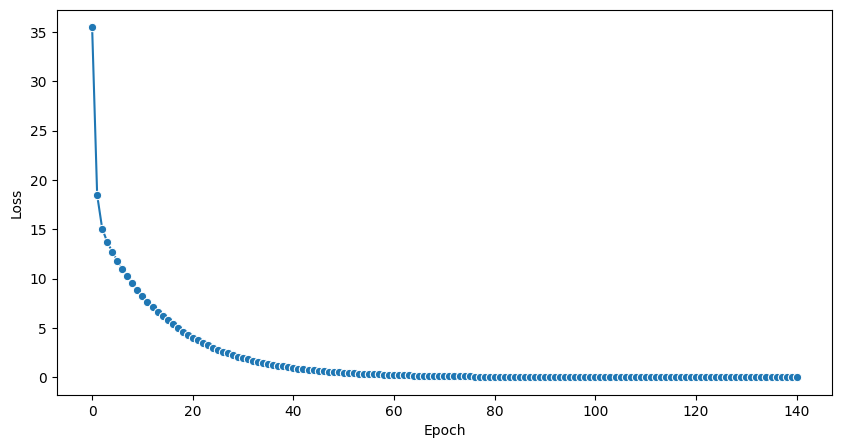

In [55]:
# a=22, b=-5
np.random.seed(42)
a = np.random.random(100)
b = 22*a - 5
theta_0, theta_1, loss = GD_SingleVariable(a, b, epochs=2000, lr=0.5, stop_condition=0.01)
plot_loss(loss)

## Multivariate LR

In [56]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [57]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [58]:
X2 = data2[:, :-1]
y2 = data2[:, -1]

X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [59]:
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [67]:
x_0 = np.ones(len(X2))
X2 = np.concatenate((x_0[:, np.newaxis], X2), axis=1)
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [68]:
y2 = y2.reshape(-1,1)

In [70]:
theta = np.zeros(X2.shape[1]).reshape(-1,1)
lr=0.0001
loss = []
m = len(y2)

for i in range(3000):
    print(f'****************** Iteration {i} ********************')
    h_x = X2@theta
    print('h(x):', h_x)

    error_vector = h_x - y2
    print('\nError Vector : ', error_vector)

    MSE = np.sum(error_vector**2) / (2*m)
    loss.append(MSE)
    print('\nj = ', MSE)

    gradient_vector = (X2.T@error_vector)/m
    print('\nGradient Vector =  ', gradient_vector)

    gradient_vec_norm = np.linalg.norm(gradient_vector)
    print('\nGradient vector norm = ', gradient_vec_norm)

    if gradient_vec_norm<0.15:
        break

    theta=theta-lr*gradient_vector
    print('\nTheta news :\n', theta)

Streaming output truncated to the last 5000 lines.
 [177.05487362]
 [158.56657027]
 [176.19800672]
 [174.43014616]
 [167.54688121]
 [151.10149709]
 [190.60333373]]

Error Vector :  [[ 0.91814137]
 [-0.36775601]
 [ 1.38369867]
 [ 2.84728011]
 [-2.0620587 ]
 [ 4.27645038]
 [ 1.54603671]
 [-1.03787111]
 [-0.66114622]
 [ 0.43816247]
 [ 2.9508796 ]
 [ 1.80708641]
 [ 2.07091912]
 [ 0.86258356]
 [ 3.50724515]
 [-3.473889  ]
 [-2.74628282]
 [-1.69429503]
 [ 0.05487362]
 [-0.43342973]
 [-0.80199328]
 [-0.56985384]
 [-7.45311879]
 [ 2.10149709]
 [-1.39666627]]

j =  3.049972129402379

Gradient Vector =   [[ 0.08265974]
 [ 0.11197002]
 [-0.04610746]
 [-0.0647579 ]]

Gradient vector norm =  0.16027913632189353

Theta news :
 [[-0.01147371]
 [ 0.36490879]
 [ 0.52625502]
 [ 1.12254534]]
****************** Iteration 2798 ********************
h(x): [[152.91817027]
 [184.6322024 ]
 [181.38369627]
 [198.84729637]
 [139.93787327]
 [105.27641693]
 [150.54609568]
 [113.96224111]
 [174.33881845]
 [164.43816

#### Predict y values using the LR equation
##### X@thetas

In [71]:
y_pred = X2@theta
print('h(x)=y_pred:\n', y_pred)
print('\ny :\n', y2)

h(x)=y_pred:
 [[152.92020419]
 [184.62929677]
 [181.38354137]
 [198.84843592]
 [139.93311858]
 [105.27405066]
 [150.55020036]
 [113.97004768]
 [174.33632794]
 [164.43809642]
 [143.95190601]
 [142.80612942]
 [186.06936726]
 [152.85898611]
 [151.51074274]
 [188.52485805]
 [144.2469899 ]
 [181.31291701]
 [177.05401745]
 [158.56657246]
 [176.20174478]
 [174.42894505]
 [167.55052324]
 [151.10035283]
 [190.60056798]]

y :
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Plot loss vs. iterations

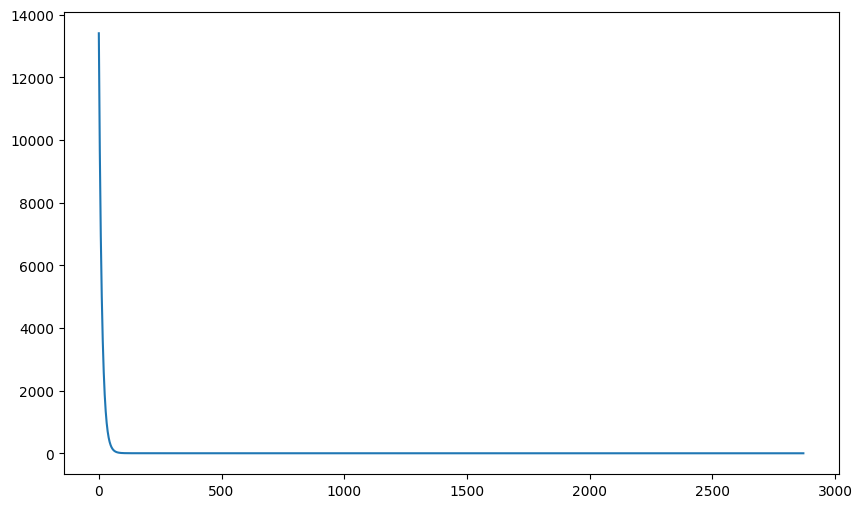

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(i+1), loss)

#### Use R2 score to evaluate LR equation output

In [73]:
r2_score(y2, y_pred)

0.9890097190059124

### Full Code

In [92]:
def GD_MultiVariables(X, y, theta=None, epochs=1000, stop_condition=0.1, lr=0.01):
  loss = []
  m = len(y)

  x_0 = np.ones(len(X))
  X = np.concatenate((x_0[:, np.newaxis], X), axis=1)
  y = y.reshape(-1,1)

  if theta is None:
    theta = np.zeros(X.shape[1]).reshape(-1,1)

  for i in tqdm(range(epochs)):
      # print(f'****************** Iteration {i} ********************')
      h_x = X@theta
      # print('h(x):', h_x)

      error_vector = h_x - y
      # print('\nError Vector : ', error_vector)

      MSE = np.sum(error_vector**2) / (2*m)
      loss.append(MSE)
      # print('\nj = ', MSE)

      gradient_vector = (X.T@error_vector)/m
      # print('\nGradient Vector =  ', gradient_vector)

      gradient_vec_norm = np.linalg.norm(gradient_vector)
      # print('\nGradient vector norm = ', gradient_vec_norm)

      if gradient_vec_norm<stop_condition:
          break

      theta=theta-lr*gradient_vector
  print('\nTheta news :\n', theta)
  return theta, loss

def plot_loss(loss):
    plt.figure(figsize=(10, 5))
    sns.lineplot(loss, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss');

  6%|▌         | 118/2000 [00:00<00:00, 12610.59it/s]



Theta news :
 [[-0.88707717]
 [ 9.91221732]
 [ 1.38940211]
 [-2.01703668]]


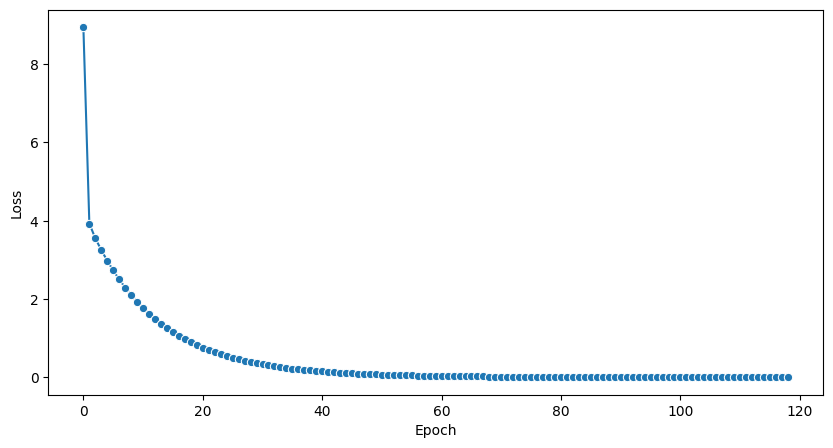

In [94]:
# 10*x1 + 1.5*x2 - 2*x3 - 1
a = np.random.random((100,3))
b = 10*a[:,0] + 1.5*a[:,1] - 2*a[:, 2] - 1

theta, loss = GD_MultiVariables(a, b, lr=0.5, stop_condition=0.01, epochs=2000,  theta=np.random.random((4,1)))
plot_loss(loss)